In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(r"../Data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print("Number of rows: {}\nNumber of colums: {}".format(df.shape[0],df.shape[1]))

Number of rows: 1000
Number of colums: 8


In [6]:
df.isna().mean()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [98]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch' ,'test preparation course']

#  Which major factors contribute to test outcomes?

<AxesSubplot:>

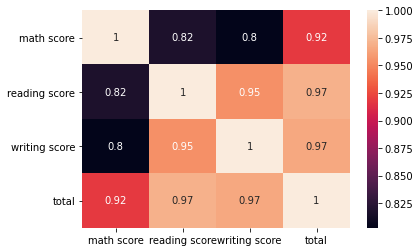

In [112]:
corr = df.corr()
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='math score', ylabel='writing score'>

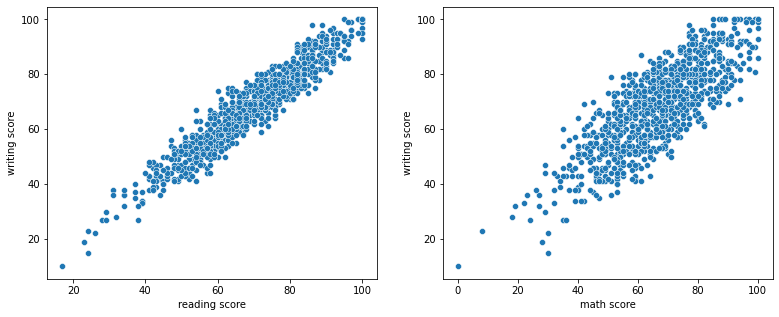

In [113]:
fig,axs = plt.subplots(1,2,figsize=(13,5))
sns.scatterplot(data=df,x='reading score',y='writing score',ax=axs[0])
sns.scatterplot(data=df,x='math score',y='writing score',ax=axs[1])

<AxesSubplot:xlabel='writing score', ylabel='Count'>

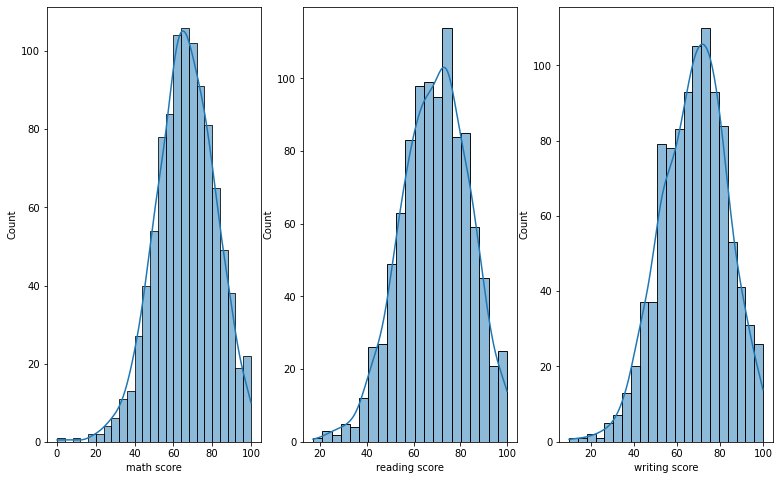

In [51]:
fig, axs = plt.subplots(1,3,figsize=(13,8))
sns.histplot(data=df,x='math score',kde=True,ax=axs[0])
sns.histplot(data=df,x='reading score',kde=True,ax=axs[1])
sns.histplot(data=df,x='writing score',kde=True,ax=axs[2])

In [52]:
df['total'] = df[['reading score', 'math score', 'writing score']].astype(float).sum(1)
df['total'] = df['total']/3

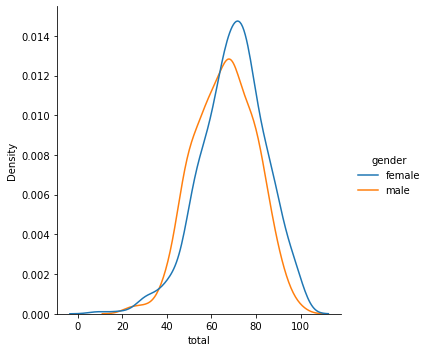

In [93]:
sns.displot(data=df,x='total',hue='gender',kind='kde')

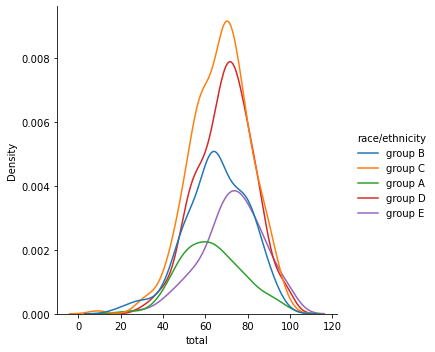

In [94]:
sns.displot(data=df,x='total',hue='race/ethnicity',kind='kde')

In [159]:
parent_education = list(df['race/ethnicity'].unique())
for i in parent_education:
    mean = df.loc[df['race/ethnicity']== i,'total'].mean()
    std = df.loc[df['race/ethnicity']== i,'total'].std()
    print(' Average score of {} is {:.0f}+-{:.0f} '.format(i,mean,std))

 Average score of group B is 65+-15 
 Average score of group C is 67+-14 
 Average score of group A is 63+-14 
 Average score of group D is 69+-13 
 Average score of group E is 73+-15 


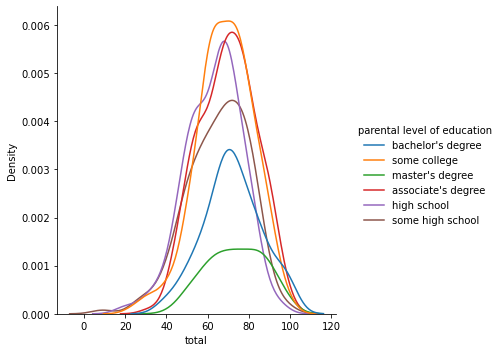

In [95]:
sns.displot(data=df,x='total',hue='parental level of education',kind='kde')

In [157]:
parent_education = list(df['parental level of education'].unique())
for i in parent_education:
    mean = df.loc[df['parental level of education']== i,'total'].mean()
    std = df.loc[df['parental level of education']== i,'total'].std()
    print('If parental level of education is {} then student will score {:.0f}+-{:.0f}'.format(i,mean,std))

If parental level of education is bachelor's degree then student will score 72+-14
If parental level of education is some college then student will score 68+-14
If parental level of education is master's degree then student will score 74+-14
If parental level of education is associate's degree then student will score 70+-14
If parental level of education is high school then student will score 63+-14
If parental level of education is some high school then student will score 65+-15


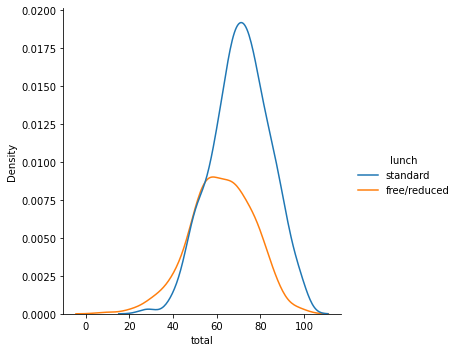

In [125]:
sns.displot(data=df,x='total',hue='lunch',kind='kde')

In [182]:
std = df.loc[df['lunch']=='standard','gender'].value_counts()
free = df.loc[df['lunch']=='free/reduced','gender'].value_counts()
print('Number of boys who eat standard lunch: {}'.format(std[0]))
print('Number of boys who eat free/reduced lunch: {}'.format(free[0]))
print('Number of girls who eat standard lunch: {}'.format(std[1]))
print('Number of girls who eat free/reduced lunch: {}'.format(free[1]))

Number of boys who eat standard lunch: 329
Number of boys who eat free/reduced lunch: 189
Number of girls who eat standard lunch: 316
Number of girls who eat free/reduced lunch: 166


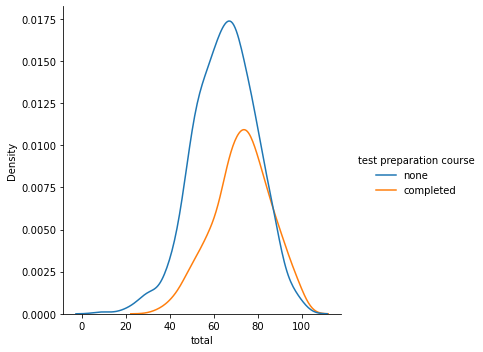

In [97]:
sns.displot(data=df,x='total',hue='test preparation course',kind='kde')

## Major factors:

1) If You're good at Reading then definitely You'll get better Score in Writing with High Probability of getting High Score in Math 

2)

                  i) Student belongs to Race C,D,E score very good

                  ii) Student belongs Race B score average marks around 60 but some of them score very high

                 iii) Student belongs Race A score around 40-50
 
 
 
3) If Parental Level of Education is High student will perform better in exam (compare to other)



4) Student with Standard lunch will have better perfomance in test

# 

# 

# How effective is the test preparation course?

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

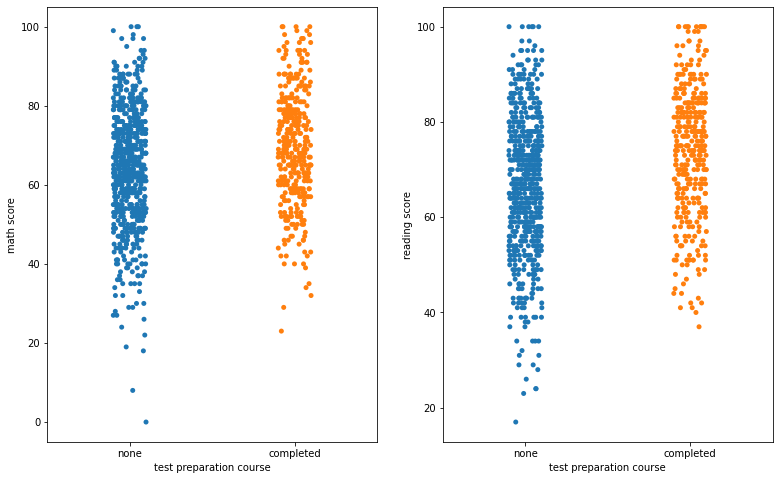

In [115]:
fig, axs = plt.subplots(1,2,figsize=(13,8))
sns.stripplot(data=df,x='test preparation course',y='math score',ax=axs[0])
sns.stripplot(data=df,x='test preparation course',y='reading score',ax=axs[1])

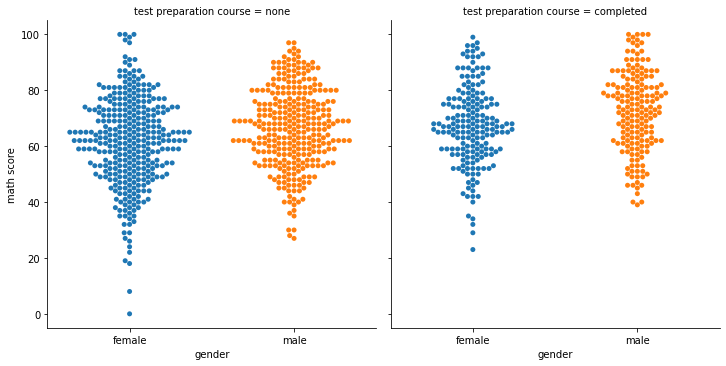

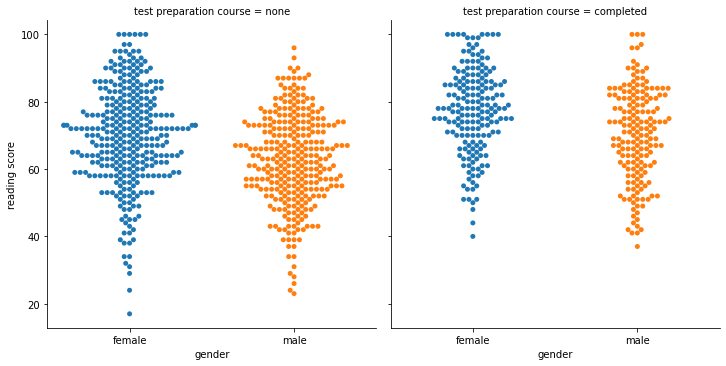

In [119]:
sns.catplot(data=df,x='gender',y='math score',col='test preparation course',kind='swarm')
sns.catplot(data=df,x='gender',y='reading score',col='test preparation course',kind='swarm')

C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Akhilesh\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


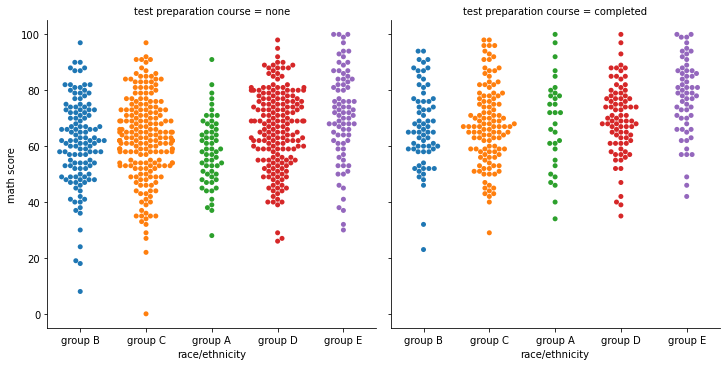

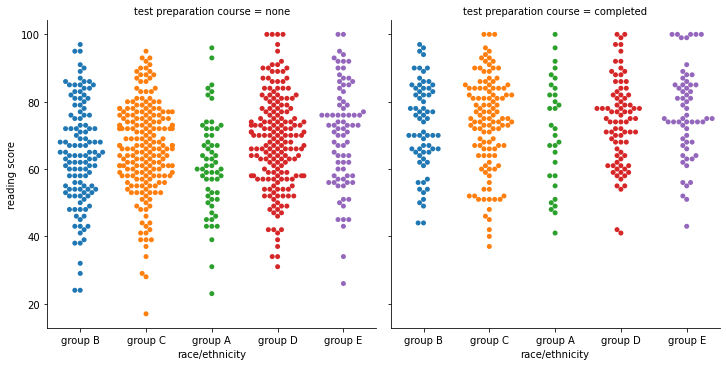

In [183]:
sns.catplot(data=df,x='race/ethnicity',y='math score',col='test preparation course',kind='swarm')
sns.catplot(data=df,x='race/ethnicity',y='reading score',col='test preparation course',kind='swarm')

## Test preparation course is will guarantee you better perfomance

# 

# 

# 

# What would be the best way to improve student scores on each test?


      i) complete your test preparation course
   
   
      ii) eat lunch properly
   
   
     iii) Try to interact with students with race C D E
  
  
     iv) At least study one subject properly